## Informasi Mahasiswa

Nama: Ivan Chiari

NPM : 2108107010027

## Jenis Dataset

Dataset dari kaggle https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset


informasi variabel
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## Import Libary dan Baca dataset

In [1]:
# Libary yang digunakan untuk membangun model ANN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [2]:
# Load the dataset
diabetes = pd.read_csv('dataset/diabetes.csv')
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Preprocessing Data

In [3]:
# Cek info dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [4]:
# Cek statistik deskriptif dataset
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [5]:
# cek missing value
print(diabetes.isnull().sum())

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


In [6]:
# cek duplicate value
print(diabetes.duplicated().sum())

0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the outcome column such that 1 means diabetes and 0 means no diabetes
label_encoder = LabelEncoder()
diabetes['outcome'] = label_encoder.fit_transform(diabetes['outcome'])

In [8]:
# Display the first five rows of the dataset
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Cek distribusi kelas pada dataset
print(diabetes['outcome'].value_counts())

outcome
0    500
1    268
Name: count, dtype: int64


0 itu negatif diabetes dan 1 itu positif diabetes

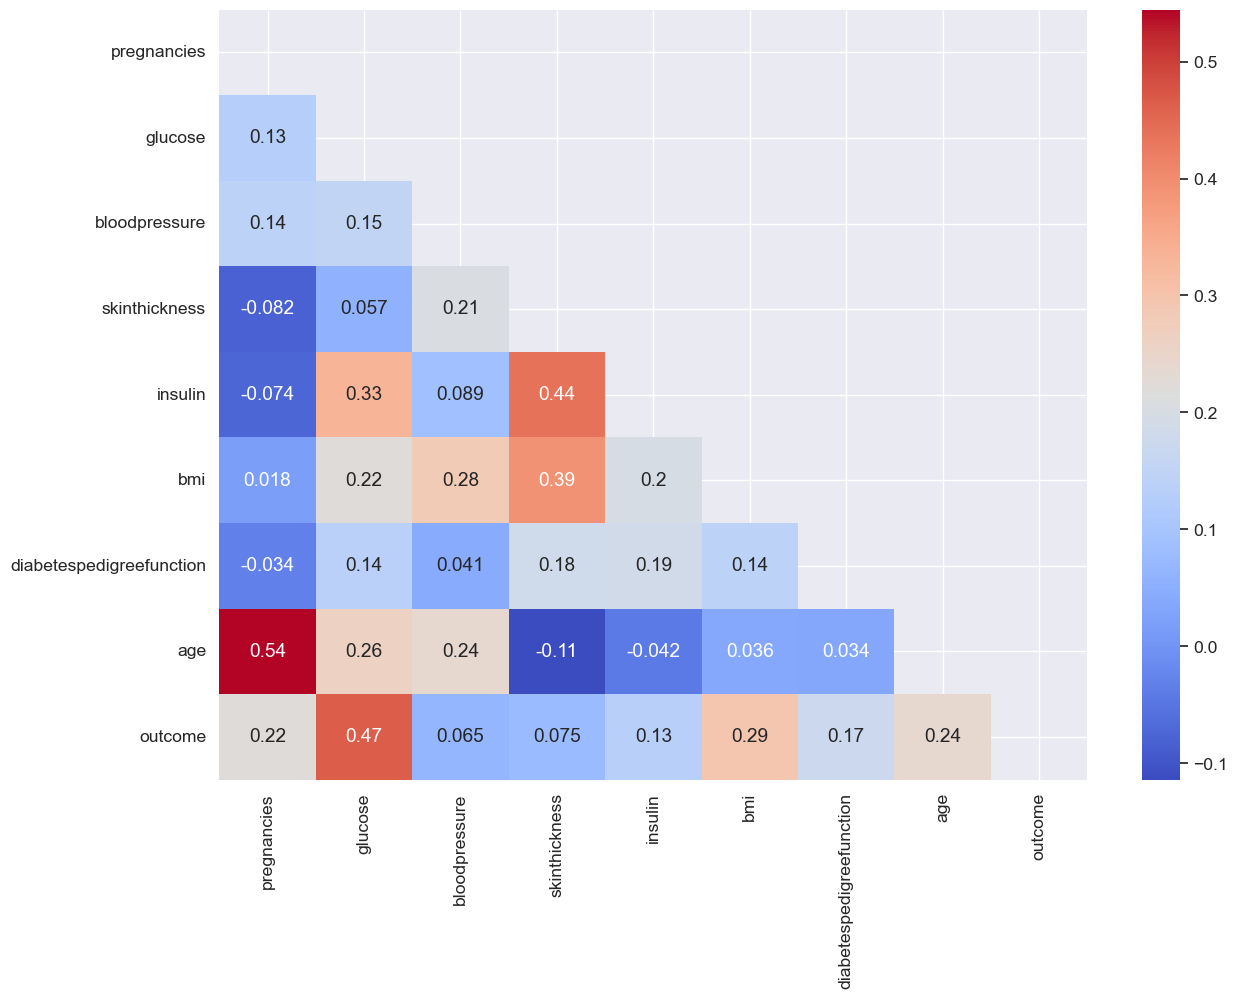

In [10]:
# check feature correlation
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
crr = diabetes.corr()
mask = np.zeros_like(crr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(crr, annot = True, linecolor = "black",cmap='coolwarm', mask=mask ,cbar=True)
plt.show()

* Setiap fitur berkorelasi positif dengan fitur outcome kecuali ketebalan kulit, tekanan darah mempunyai korelasi sangat kecil hingga tidak penting.

* fitur Glukosa sangat berkorelasi positif, yang menyatakan fakta bahwa diabetes terjadi karena tingginya kadar gula darah dalam aliran darah yang tidak mampu diserap oleh sel secara efektif.

In [11]:
diabetes.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

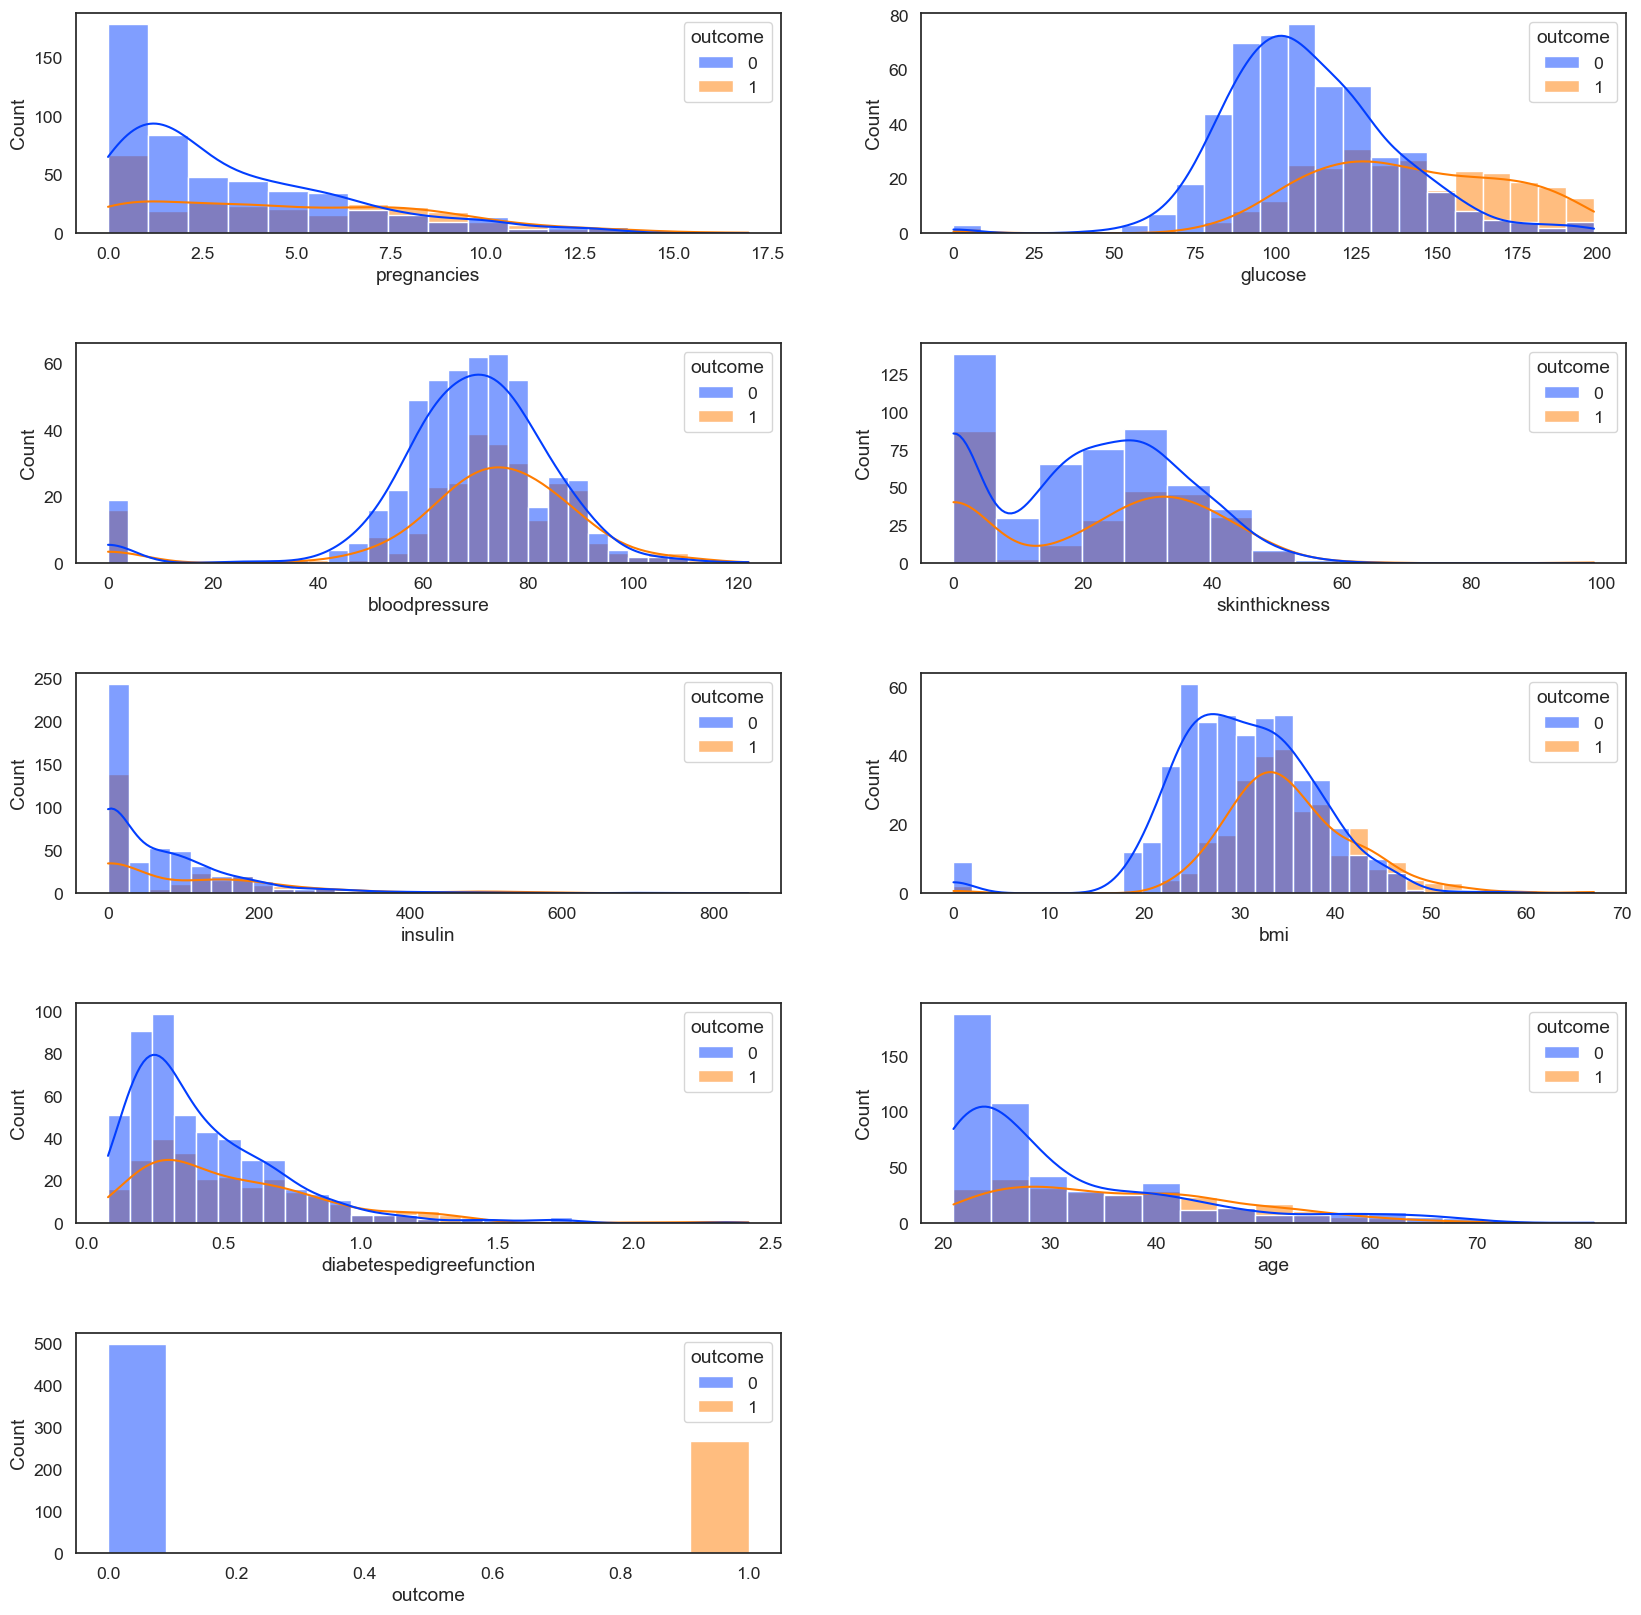

In [12]:
plt.figure(figsize = (20,20))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1
for name in diabetes.columns:
    plt.subplot(5,2,i)
    sns.histplot( data=diabetes, x=name, hue="outcome",kde=True,palette="bright")
    i = i + 1

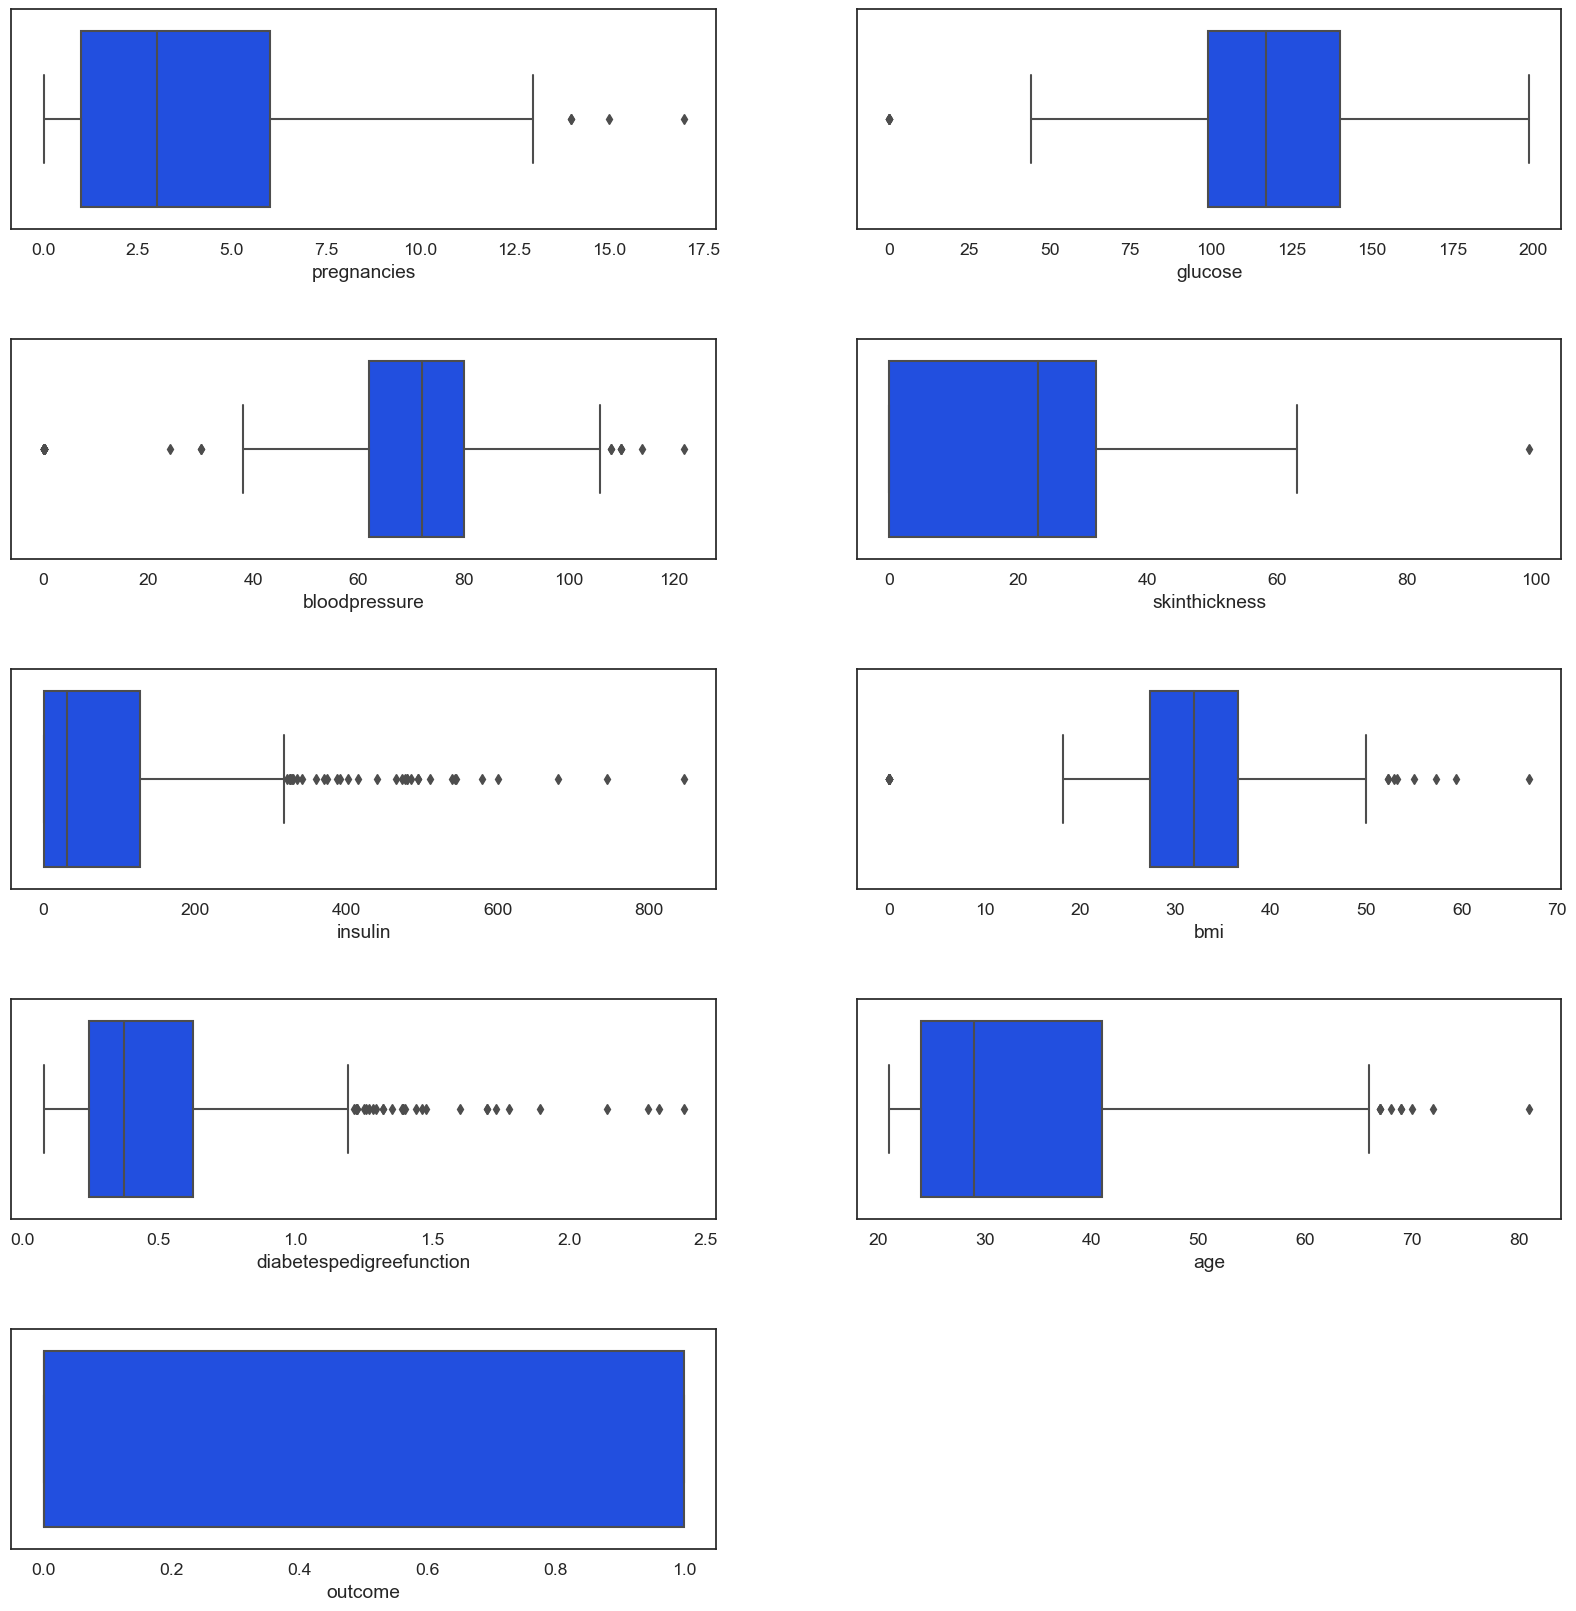

In [13]:
# make boxplot to check outliers
plt.figure(figsize = (20,20))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1
for name in diabetes.columns:
    plt.subplot(5,2,i)
    sns.boxplot( data=diabetes, x=name, hue="outcome",palette="bright")
    i = i + 1

In [14]:
# remove outliers using IQR
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# hapus outliers menggunakan IQR
diabetes = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) |(diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

pregnancies                   5.0000
glucose                      41.2500
bloodpressure                18.0000
skinthickness                32.0000
insulin                     127.2500
bmi                           9.3000
diabetespedigreefunction      0.3825
age                          17.0000
outcome                       1.0000
dtype: float64


In [15]:
# make new group for age
diabetes.loc[diabetes['age']<=18,'Age_Brack'] = 1
diabetes.loc[(diabetes['age']>18) & (diabetes['age']<=30) ,'Age_Brack' ] =2
diabetes.loc[(diabetes['age']>30) & (diabetes['age']<=40),'Age_Brack'] = 3
diabetes.loc[(diabetes['age']>40) & (diabetes['age']<=50),'Age_Brack'] = 4
diabetes.loc[(diabetes['age']>50) & (diabetes['age']<=60),'Age_Brack'] = 5
diabetes.loc[(diabetes['age']>60) & (diabetes['age']<=70),'Age_Brack'] = 6
diabetes.loc[(diabetes['age']>70) & (diabetes['age']<=80),'Age_Brack'] = 7
diabetes.loc[(diabetes['age']>80) & (diabetes['age']<=150),'Age_Brack'] = 8

untuk menangani usia yang rentangnya cukup panjang maka saya ambil cara untuk mengelompokkan data umur dari rentang tertentu

## Split dataset dan normalisasi data

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = diabetes.drop(['age','outcome'],axis = 1 )
y = diabetes['outcome']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Data dibagi menjadi data train dan test set dengan perbandingan 80% training dan 20% testing

In [17]:
# print the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 8)
(128, 8)
(511,)
(128,)


## Membangun Model 

In [18]:
# make custom callback function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nAkurasi telah mencapai lebih dari 95%!")
            self.model.stop_training = True
            
callbacks = myCallback()


In [19]:

# Initialize the ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# set optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 100225 (391.50 KB)
Trainable params: 100225 (391.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Deskripsi model Artificial Neural Network (ANN) :

1. **Input Layer**:
   - Jenis: Dense Layer (Layer padat)
   - Jumlah Neuron: 128
   - Fungsi Aktivasi: ReLU (Rectified Linear Activation)
   - Input Shape: Shape dari data yang dimasukkan ke dalam model, diatur sesuai dengan dimensi dari `X_train`. Shape input adalah `(jumlah_fitur,)`, dimana `jumlah_fitur` merupakan jumlah fitur dari dataset.

2. **Hidden Layers**:
   - Jenis: Dense Layer (Layer padat)
   - Jumlah Neuron:
     - Hidden Layer 1: 256
     - Hidden Layer 2: 256
   - Fungsi Aktivasi: ReLU (Rectified Linear Activation)
   - Keterangan: Dua hidden layer digunakan untuk mengekstraksi fitur-fitur yang kompleks dari data input.

3. **Output Layer**:
   - Jenis: Dense Layer (Layer padat)
   - Jumlah Neuron: 1
   - Fungsi Aktivasi: Sigmoid
   - Keterangan: Layer output yang memiliki satu neuron digunakan untuk output binary (0 atau 1). Fungsi aktivasi sigmoid digunakan untuk menghasilkan output yang berada dalam rentang antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas kelas positif.

4. **Optimizer**:
   - Jenis: Adam Optimizer
   - Learning Rate: 0.01
   - Keterangan: Adam optimizer digunakan untuk mengoptimalkan model dengan learning rate sebesar 0.01. Optimizer ini umumnya efektif dalam menangani masalah-masalah pada data yang besar dengan gradient descent yang adaptif.

5. **Loss Function**:
   - Jenis: Binary Crossentropy
   - Keterangan: Binary crossentropy digunakan sebagai fungsi loss karena model ini merupakan model klasifikasi biner. Loss function ini cocok untuk perbandingan antara probabilitas prediksi model dengan label sebenarnya.

6. **Metrik Evaluasi**:
   - Metrik: Akurasi (Accuracy)
   - Keterangan: Metrik evaluasi yang digunakan untuk memantau performa model adalah akurasi, yang mengukur seberapa sering model memberikan prediksi yang benar.

7. **Total Parameters**:
   - Total Parameters: 100,225
   - Trainable Parameters: 100,225
   - Non-trainable Parameters: 0
   - Keterangan: Total parameter model adalah jumlah dari parameter-parameter yang dapat dipelajari (trainable parameters) dan parameter-parameter yang tidak dapat dipelajari (non-trainable parameters). Semua parameter pada model ini dapat dipelajari melalui proses training. Total parameter tergantung pada jumlah neuron dan koneksi antar layer pada arsitektur model.

In [20]:
# Train the model
model.history = model.fit(X_train, y_train, 
                          epochs=100, batch_size=32, 
                          validation_split=0.2, 
                          callbacks=[callbacks], verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.5801 - accuracy: 0.7255 - val_loss: 0.5375 - val_accuracy: 0.7282
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.8088 - val_loss: 0.6518 - val_accuracy: 0.6893
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8064 - val_loss: 0.5508 - val_accuracy: 0.7184
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8235 - val_loss: 0.6711 - val_accuracy: 0.6990
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.6266 - val_accuracy: 0.7087
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8554 - val_loss: 0.7640 - val_accuracy: 0.7379
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.8554 - val_loss: 0.7588 - val_accuracy: 0.6990
Epoch 8/100


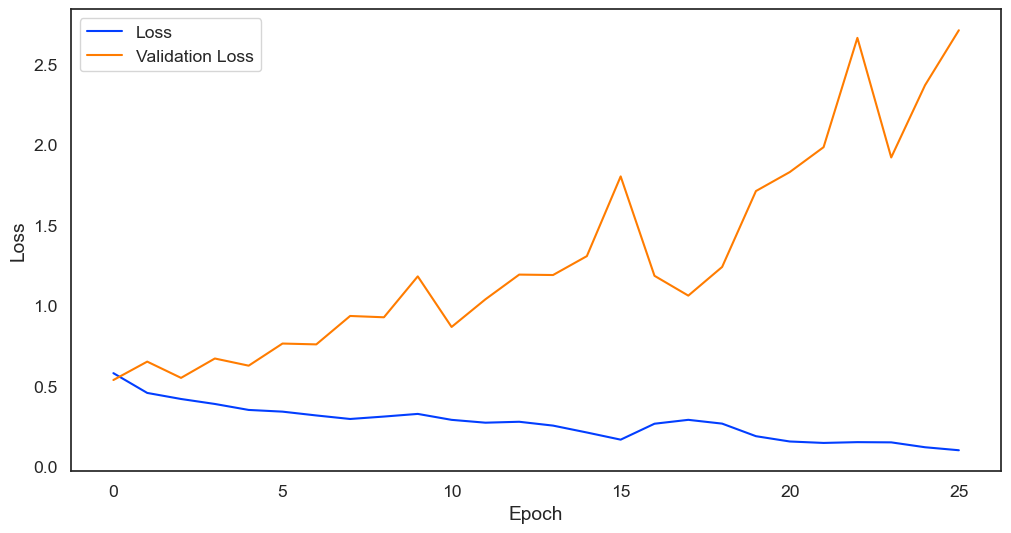

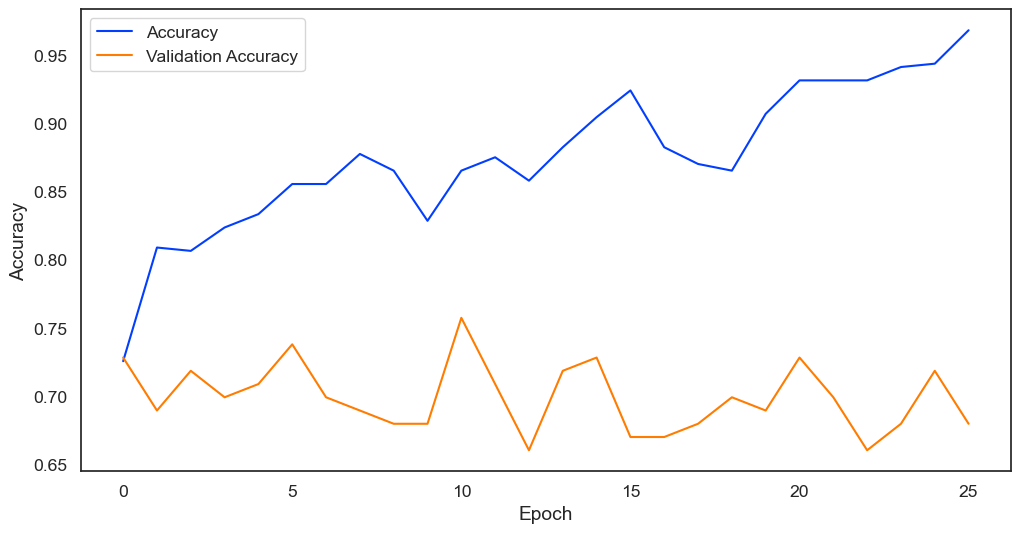

In [21]:
# loss plot
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [22]:
# Predict the target variable
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Loss: 1.47
Accuracy: 81.25%


In [23]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


4/4 [==============================] - 0s 1ms/step


In [24]:
# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the accuracy with classification report
print(classification_report(y_test, y_pred))


[[77 15]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        92
           1       0.64      0.75      0.69        36

    accuracy                           0.81       128
   macro avg       0.77      0.79      0.78       128
weighted avg       0.82      0.81      0.82       128



In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# metrics evaluasi
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi: {akurasi*100:.2f}%')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall*100:.2f}%')
presisi = precision_score(y_test, y_pred)
print(f'Presisi: {presisi*100:.2f}%')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1*100:.2f}%')

Akurasi: 81.25%
Recall: 75.00%
Presisi: 64.29%
F1 Score: 69.23%


Dari hasil prediksi dengan data uji, diperoleh beberapa metrik evaluasi performa model. Berikut adalah hasilnya:

- **Akurasi (Accuracy):** 81.25%
  - Akurasi merupakan persentase dari jumlah prediksi yang benar dibandingkan dengan total jumlah prediksi. Dalam konteks ini, model berhasil memprediksi kelas dengan benar sebesar 81.29%.

- **Recall:** 75.00%
  - Recall mengukur kemampuan model dalam mengidentifikasi semua positif yang sebenarnya. Dalam konteks ini, model dapat mengidentifikasi 75.00% dari semua kasus positif yang sebenarnya.

- **Presisi (Precision):** 64.29%
  - 64.29% dari semua prediksi positif yang dilakukan oleh model adalah benar.

- **F1 Score:** 69.23%
  - F1 Score merupakan harmonic mean dari recall dan presisi. Ini memberikan indikasi tentang keseimbangan antara recall dan presisi. Semakin tinggi nilai F1 Score, semakin baik performa model dalam menghasilkan prediksi yang tepat dan mengidentifikasi instance positif dengan baik.


In [26]:
# make new data to be predicted with the model
new_data = np.array([[6,148,72,35,0,33.6,0.627,50]])
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)
new_pred = np.round(new_pred).astype(int)
print(new_pred)

1/1 [==============================] - 0s 49ms/step
[[0]]


dengan data baru model memprediksi bahwa pasien tidak diabetes